# Gyakorlat 09
## Support Vektor Machine (SVM)
### Classification

### 1: Importálás / adatok betöltése

In [1]:
import numpy as np
from scipy.io import loadmat
from sklearn.svm import SVC
import matplotlib.pyplot as plt

data = loadmat('Lab9data1.mat')
X1 = data["X"]
Y1 = data["y"]

print(X1.shape)
print(Y1.shape)

(51, 2)
(51, 1)


### Vizualizálás

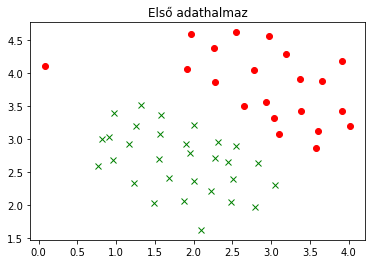

In [2]:
def dataSeparation(X,Y):
    CLR1 = []                                                           # cluster1
    CLR2 = []                                                           # cluster2
    
    for i in range(Y.shape[0]):
        if (Y[i] == 0):
            CLR1.append(X[i,:])
        elif (Y[i] == 1):
            CLR2.append(X[i,:])
            
    CLR1 = np.asmatrix(CLR1)
    CLR2 = np.asmatrix(CLR2)
    return CLR1, CLR2

CLR11,CLR12 = dataSeparation(X1,Y1)

plt.plot(CLR11[:,0],CLR11[:,1],'gx')
plt.plot(CLR12[:,0],CLR12[:,1],'ro')
plt.title("Első adathalmaz")
plt.show()

### 2: Lineáris SVM tanítása

SVC(C=0.5, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)


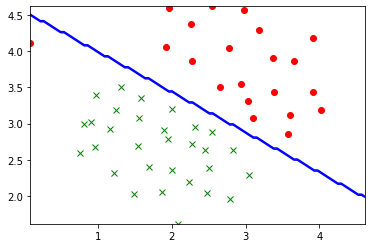

In [33]:
classifier1 = SVC(C=0.5,kernel="linear")
print(classifier1)
classifier.fit(X1,np.ravel(Y1))

plt.plot(CLR11[:,0],CLR11[:,1],'gx')
plt.plot(CLR12[:,0],CLR12[:,1],'ro')
                                                            # plotting the decision boundary
X_1,X_2 = np.meshgrid(np.linspace(X1[:,0].min(),X1[:,1].max(),num=100),np.linspace(X1[:,1].min(),X1[:,1].max(),num=100))
desBoundary1 = classifier.predict(np.array([X_1.ravel(),X_2.ravel()]).T).reshape(X_1.shape)
plt.contour(X_1,X_2,desBoundary1,1,colors="b")
plt.show()

### Tesztelés C = 100 al.

SVC(C=100, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)


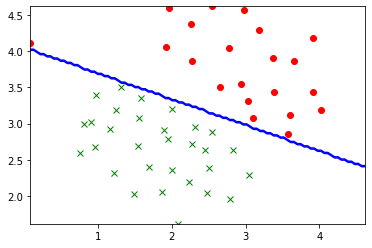

In [34]:
classifier2 = SVC(C=100,kernel="linear")
print(classifier2)
classifier2.fit(X1,np.ravel(Y1))

plt.plot(CLR11[:,0],CLR11[:,1],'gx')
plt.plot(CLR12[:,0],CLR12[:,1],'ro')
                                                            # plotting the decision boundary
X_1,X_2 = np.meshgrid(np.linspace(X1[:,0].min(),X1[:,1].max(),num=100),np.linspace(X1[:,1].min(),X1[:,1].max(),num=100))
desBoundary2 = classifier2.predict(np.array([X_1.ravel(),X_2.ravel()]).T).reshape(X_1.shape)
plt.contour(X_1,X_2,desBoundary2,1,colors="b")
plt.show()

### 3: Második adathalmaz betöltése és vizualizálása

(863, 2)
(863, 1)


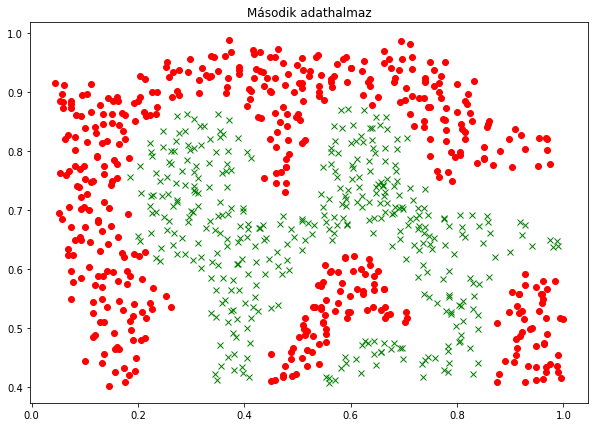

In [35]:
data = loadmat('Lab9data2.mat')
X2 = data["X"]
Y2 = data["y"]
print(X2.shape)
print(Y2.shape)

CLR21,CLR22 = dataSeparation(X2,Y2)

plt.figure(figsize=(10,7))
plt.plot(CLR21[:,0],CLR21[:,1],'gx')
plt.plot(CLR22[:,0],CLR22[:,1],'ro')
plt.title("Második adathalmaz")
plt.show()

### 4: Gauss kernel

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=30, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)


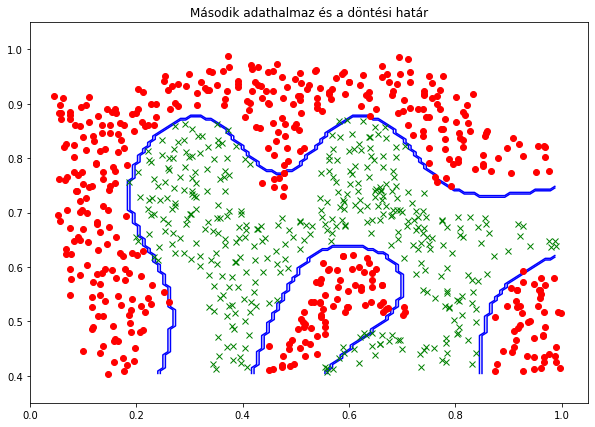

In [38]:
classifier3 = SVC(kernel = "rbf", gamma=30)
print(classifier3)
classifier3.fit(X2,Y2.ravel())

plt.figure(figsize=(10,7))
plt.plot(CLR21[:,0],CLR21[:,1],'gx')
plt.plot(CLR22[:,0],CLR22[:,1],'ro')
plt.title('Második adathalmaz és a döntési határ')

X_5,X_6 = np.meshgrid(np.linspace(X2[:,0].min(),X2[:,1].max(),num=100),np.linspace(X2[:,1].min(),X2[:,1].max(),num=100))
desBoundary3 = classifier3.predict(np.array([X_5.ravel(),X_6.ravel()]).T).reshape(X_5.shape)
plt.contour(X_5,X_6,desBoundary3,1,colors = "b")
plt.xlim(0,1.05)
plt.ylim(0.35,1.05)
plt.show()

Ha nullát írok a contourba akkor egy vonalat ad, de warningol.... és nem jöttem még rá hogy hogy lehetne feloldani... ha 1 akkor meg 2 vonalat húz

### 5: Harmadik adathalmaz vizualizálása

(211, 2)
(211, 1)


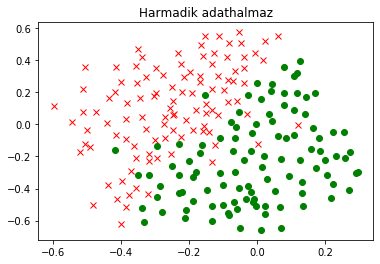

In [44]:
data = loadmat("Lab9data3.mat")
X3 = data["X"]
Y3 = data["y"]
Xval = data["Xval"]
Yval = data["yval"]
print(X3.shape)
print(Y3.shape)

CLR31,CLR32 = dataSeparation(X3,Y3)

plt.plot(CLR31[:,0],CLR31[:,1],"go")
plt.plot(CLR32[:,0],CLR32[:,1],"rx")
plt.title("Harmadik adathalmaz")
plt.show()


### 6: Paraméter becslése néhány C értékével

In [61]:
def dataset3Params(X, y, Xval, yval,vals):
    acc = 0
    best_c=0
    best_gamma=0
    for i in vals:
        C= i
        for j in vals:
            gamma = 1/j
            classifier = SVC(C=C,gamma=gamma)
            classifier.fit(X,y)
            prediction = classifier.predict(Xval)
            score = classifier.score(Xval,yval)
            if score>acc:
                acc =score
                best_c =C
                best_gamma=gamma
    return best_c, best_gamma

C_vals = [0.01, 0.03, 0.1, 0.3, 1, 3, 10, 30]
C, gamma = dataset3Params(X3, Y3.ravel(), Xval, Yval.ravel(),C_vals)
classifier4 = SVC(C=C,gamma=gamma)
print(classifier4)
classifier4.fit(X3,Y3.ravel())
print('Best values:\nC =',C,'\ngamma =',gamma)

SVC(C=0.3, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=100.0, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)
Best values:
C = 0.3 
gamma = 100.0


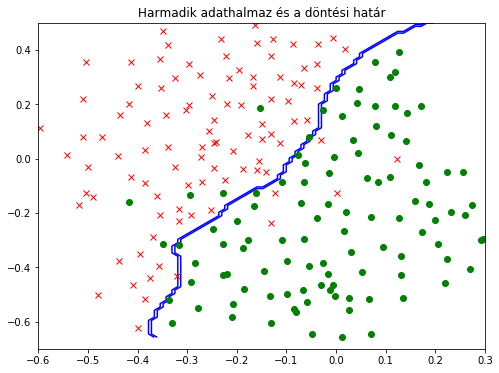

In [62]:
plt.figure(figsize=(8,6))
plt.plot(CLR31[:,0],CLR31[:,1],"go")
plt.plot(CLR32[:,0],CLR32[:,1],"rx")
plt.title("Harmadik adathalmaz és a döntési határ")
# plotting the decision boundary
X_7,X_8 = np.meshgrid(np.linspace(X3[:,0].min(),X3[:,1].max(),num=100),np.linspace(X3[:,1].min(),X3[:,1].max(),num=100))
desBoundary4 = classifier4.predict(np.array([X_7.ravel(),X_8.ravel()]).T).reshape(X_7.shape)
plt.contour(X_7,X_8,desBoundary4,1,colors="b")
plt.xlim(-0.6,0.3)
plt.ylim(-0.7,0.5)
plt.show()

itt is ugyanaz van...